# Group Assignment 3
## A "Functional" Notebook
Name: Jiaming Zhu

Description: A clean verison of midterm. Add function and loop. This notebook expore dataset of public transit safety events in LA from 2018 to 2022 and census dataset of household income in Los Angeles region. Tend to find distribution characteristic of public transit safety events, and the relationship between traffic accidents household income.

Because the notebook is too large, so I seperate it. This notebook only contains private vehicle accidents on household income map.

## Importing Data
Importing libraries and dataset, check the data information. In this part, I will check the basic information of public transit safety events in LA.

In [29]:
# importing python libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

## Census Data Exploration
In this part, we will explore household income census data.

In [2]:
# read and add shapefile to notebook
df = pd.read_csv('Data/R13559086_SL140.csv')

Because we already look the basic information for this dataset in Week3, so at this time, we skip these steps.

In [3]:
# try to see all the data and display a sample row
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.sample()

,Geo_FIPS,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_US,Geo_REGION,Geo_DIVISION,Geo_STATE,Geo_COUNTY,Geo_COUSUB,Geo_PLACE,Geo_TRACT,Geo_BLKGRP,Geo_CONCIT,Geo_AIANHH,Geo_AIANHHFP,Geo_AIHHTLI,Geo_AITS,Geo_ANRC,Geo_CBSA,Geo_CSA,Geo_METDIV,Geo_MACC,Geo_MEMI,Geo_NECTA,Geo_CNECTA,Geo_NECTADIV,Geo_UA,Geo_CDCURR,Geo_SLDU,Geo_SLDL,Geo_ZCTA3,Geo_ZCTA5,Geo_SUBMCD,Geo_SDELM,Geo_SDSEC,Geo_SDUNI,Geo_UR,Geo_PCI,Geo_PUMA5,Geo_NAME,Geo_BTTR,Geo_BTBG,Geo_PLACESE,SE_A14001_001,SE_A14001_002,SE_A14001_003,SE_A14001_004,SE_A14001_005,SE_A14001_006,SE_A14001_007,SE_A14001_008,SE_A14001_009,SE_A14001_010,SE_A14001_011,SE_A14001_012,SE_A14001_013,SE_A14001_014,SE_A14001_015,SE_A14001_016,SE_A14001_017,PCT_SE_A14001_002,PCT_SE_A14001_003,PCT_SE_A14001_004,PCT_SE_A14001_005,PCT_SE_A14001_006,PCT_SE_A14001_007,PCT_SE_A14001_008,PCT_SE_A14001_009,PCT_SE_A14001_010,PCT_SE_A14001_011,PCT_SE_A14001_012,PCT_SE_A14001_013,PCT_SE_A14001_014,PCT_SE_A14001_015,PCT_SE_A14001_016,PCT_SE_A14001_017,Low-Income,Middle-Income,High-Income
65,6037108101,"Census Tract 1081.01, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,6,37,NaN,NaN,108101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Census Tract 1081.01,NaN,NaN,NaN,762,22,27,7,0,18,7,20,0,16,20,55,62,38,89,96,285,2.89,3.54,0.92,0.0,2.36,0.92,2.62,0.0,2.1,2.62,7.22,8.14,4.99,11.68,12.6,37.4,117,264,381


In [4]:
# convert FIPS, STATE, and COUNTY to string
df = pd.read_csv(
    'Data/R13559086_SL140.csv',
    dtype=
    {
        'Geo_FIPS':str,
        'Geo_STATE':str,
        'Geo_COUNTY': str
    }
)

In [5]:
# check data again
df.head()

,Geo_FIPS,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_US,Geo_REGION,Geo_DIVISION,Geo_STATE,Geo_COUNTY,Geo_COUSUB,Geo_PLACE,Geo_TRACT,Geo_BLKGRP,Geo_CONCIT,Geo_AIANHH,Geo_AIANHHFP,Geo_AIHHTLI,Geo_AITS,Geo_ANRC,Geo_CBSA,Geo_CSA,Geo_METDIV,Geo_MACC,Geo_MEMI,Geo_NECTA,Geo_CNECTA,Geo_NECTADIV,Geo_UA,Geo_CDCURR,Geo_SLDU,Geo_SLDL,Geo_ZCTA3,Geo_ZCTA5,Geo_SUBMCD,Geo_SDELM,Geo_SDSEC,Geo_SDUNI,Geo_UR,Geo_PCI,Geo_PUMA5,Geo_NAME,Geo_BTTR,Geo_BTBG,Geo_PLACESE,SE_A14001_001,SE_A14001_002,SE_A14001_003,SE_A14001_004,SE_A14001_005,SE_A14001_006,SE_A14001_007,SE_A14001_008,SE_A14001_009,SE_A14001_010,SE_A14001_011,SE_A14001_012,SE_A14001_013,SE_A14001_014,SE_A14001_015,SE_A14001_016,SE_A14001_017,PCT_SE_A14001_002,PCT_SE_A14001_003,PCT_SE_A14001_004,PCT_SE_A14001_005,PCT_SE_A14001_006,PCT_SE_A14001_007,PCT_SE_A14001_008,PCT_SE_A14001_009,PCT_SE_A14001_010,PCT_SE_A14001_011,PCT_SE_A14001_012,PCT_SE_A14001_013,PCT_SE_A14001_014,PCT_SE_A14001_015,PCT_SE_A14001_016,PCT_SE_A14001_017,Low-Income,Middle-Income,High-Income
0,06037101110,"Census Tract 1011.10, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,06,037,NaN,NaN,101110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Census Tract 1011.10,NaN,NaN,NaN,1551,67,96,33,72,11,78,19,56,96,74,221,102,182,144,123,177,4.32,6.19,2.13,4.64,0.71,5.03,1.23,3.61,6.19,4.77,14.25,6.58,11.73,9.28,7.93,11.41,528,723,300
1,06037101122,"Census Tract 1011.22, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,06,037,NaN,NaN,101122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Census Tract 1011.22,NaN,NaN,NaN,1383,84,0,7,44,20,29,0,4,10,31,208,173,102,181,204,286,6.07,0.00,0.51,3.18,1.45,2.10,0.00,0.29,0.72,2.24,15.04,12.51,7.38,13.09,14.75,20.68,198,695,490
2,06037101220,"Census Tract 1012.20, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,06,037,NaN,NaN,101220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Census Tract 1012.20,NaN,NaN,NaN,1349,85,61,9,91,24,24,71,39,60,81,209,172,43,109,130,141,6.30,4.52,0.67,6.75,1.78,1.78,5.26,2.89,4.45,6.00,15.49,12.75,3.19,8.08,9.64,10.45,464,614,271
3,06037101221,"Census Tract 1012.21, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,06,037,NaN,NaN,101221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Census Tract 1012.21,NaN,NaN,NaN,1424,84,90,59,136,26,107,9,91,65,145,95,150,140,65,111,51,5.90,6.32,4.14,9.55,1.83,7.51,0.63,6.39,4.56,10.18,6.67,10.53,9.83,4.56,7.79,3.58,667,595,162
4,06037101222,"Census Tract 1012.22, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,06,037,NaN,NaN,101222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Census Tract 1012.22,NaN,NaN,NaN,928,68,182,60,29,33,55,52,19,27,23,23,107,26,137,35,52,7.33,19.61,6.47,3.12,3.56,5.93,5.60,2.05,2.91,2.48,2.48,11.53,2.80,14.76,3.77,5.60,525,316,87


In [6]:
# confirm the columns have correct data type
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 81 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           2498 non-null   object 
 1   Geo_QName          2498 non-null   object 
 2   Geo_STUSAB         2498 non-null   object 
 3   Geo_SUMLEV         2498 non-null   int64  
 4   Geo_GEOCOMP        2498 non-null   int64  
 5   Geo_US             0 non-null      float64
 6   Geo_REGION         0 non-null      float64
 7   Geo_DIVISION       0 non-null      float64
 8   Geo_STATE          2498 non-null   object 
 9   Geo_COUNTY         2498 non-null   object 
 10  Geo_COUSUB         0 non-null      float64
 11  Geo_PLACE          0 non-null      float64
 12  Geo_TRACT          2498 non-null   int64  
 13  Geo_BLKGRP         0 non-null      float64
 14  Geo_CONCIT         0 non-null      float64
 15  Geo_AIANHH         0 non-null      float64
 16  Geo_AIANHHFP       0 non

In [7]:
# check which columns are null columns
df.columns[df.isna().all()].tolist()

['Geo_US',
 'Geo_REGION',
 'Geo_DIVISION',
 'Geo_COUSUB',
 'Geo_PLACE',
 'Geo_BLKGRP',
 'Geo_CONCIT',
 'Geo_AIANHH',
 'Geo_AIANHHFP',
 'Geo_AIHHTLI',
 'Geo_AITS',
 'Geo_ANRC',
 'Geo_CBSA',
 'Geo_CSA',
 'Geo_METDIV',
 'Geo_MACC',
 'Geo_MEMI',
 'Geo_NECTA',
 'Geo_CNECTA',
 'Geo_NECTADIV',
 'Geo_UA',
 'Geo_CDCURR',
 'Geo_SLDU',
 'Geo_SLDL',
 'Geo_ZCTA3',
 'Geo_ZCTA5',
 'Geo_SUBMCD',
 'Geo_SDELM',
 'Geo_SDSEC',
 'Geo_SDUNI',
 'Geo_UR',
 'Geo_PCI',
 'Geo_PUMA5',
 'Geo_BTTR',
 'Geo_BTBG',
 'Geo_PLACESE']

In [8]:
# delete null columns
df = df.dropna(axis=1,how="all")

In [9]:
# check data information again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           2498 non-null   object 
 1   Geo_QName          2498 non-null   object 
 2   Geo_STUSAB         2498 non-null   object 
 3   Geo_SUMLEV         2498 non-null   int64  
 4   Geo_GEOCOMP        2498 non-null   int64  
 5   Geo_STATE          2498 non-null   object 
 6   Geo_COUNTY         2498 non-null   object 
 7   Geo_TRACT          2498 non-null   int64  
 8   Geo_NAME           2498 non-null   object 
 9   SE_A14001_001      2498 non-null   int64  
 10  SE_A14001_002      2498 non-null   int64  
 11  SE_A14001_003      2498 non-null   int64  
 12  SE_A14001_004      2498 non-null   int64  
 13  SE_A14001_005      2498 non-null   int64  
 14  SE_A14001_006      2498 non-null   int64  
 15  SE_A14001_007      2498 non-null   int64  
 16  SE_A14001_008      2498 

In [10]:
# display and check the fisrt 5 row
df.head()

,Geo_FIPS,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_STATE,Geo_COUNTY,Geo_TRACT,Geo_NAME,SE_A14001_001,SE_A14001_002,SE_A14001_003,SE_A14001_004,SE_A14001_005,SE_A14001_006,SE_A14001_007,SE_A14001_008,SE_A14001_009,SE_A14001_010,SE_A14001_011,SE_A14001_012,SE_A14001_013,SE_A14001_014,SE_A14001_015,SE_A14001_016,SE_A14001_017,PCT_SE_A14001_002,PCT_SE_A14001_003,PCT_SE_A14001_004,PCT_SE_A14001_005,PCT_SE_A14001_006,PCT_SE_A14001_007,PCT_SE_A14001_008,PCT_SE_A14001_009,PCT_SE_A14001_010,PCT_SE_A14001_011,PCT_SE_A14001_012,PCT_SE_A14001_013,PCT_SE_A14001_014,PCT_SE_A14001_015,PCT_SE_A14001_016,PCT_SE_A14001_017,Low-Income,Middle-Income,High-Income
0,06037101110,"Census Tract 1011.10, Los Angeles County, Cali...",ca,140,0,06,037,101110,Census Tract 1011.10,1551,67,96,33,72,11,78,19,56,96,74,221,102,182,144,123,177,4.32,6.19,2.13,4.64,0.71,5.03,1.23,3.61,6.19,4.77,14.25,6.58,11.73,9.28,7.93,11.41,528,723,300
1,06037101122,"Census Tract 1011.22, Los Angeles County, Cali...",ca,140,0,06,037,101122,Census Tract 1011.22,1383,84,0,7,44,20,29,0,4,10,31,208,173,102,181,204,286,6.07,0.00,0.51,3.18,1.45,2.10,0.00,0.29,0.72,2.24,15.04,12.51,7.38,13.09,14.75,20.68,198,695,490
2,06037101220,"Census Tract 1012.20, Los Angeles County, Cali...",ca,140,0,06,037,101220,Census Tract 1012.20,1349,85,61,9,91,24,24,71,39,60,81,209,172,43,109,130,141,6.30,4.52,0.67,6.75,1.78,1.78,5.26,2.89,4.45,6.00,15.49,12.75,3.19,8.08,9.64,10.45,464,614,271
3,06037101221,"Census Tract 1012.21, Los Angeles County, Cali...",ca,140,0,06,037,101221,Census Tract 1012.21,1424,84,90,59,136,26,107,9,91,65,145,95,150,140,65,111,51,5.90,6.32,4.14,9.55,1.83,7.51,0.63,6.39,4.56,10.18,6.67,10.53,9.83,4.56,7.79,3.58,667,595,162
4,06037101222,"Census Tract 1012.22, Los Angeles County, Cali...",ca,140,0,06,037,101222,Census Tract 1012.22,928,68,182,60,29,33,55,52,19,27,23,23,107,26,137,35,52,7.33,19.61,6.47,3.12,3.56,5.93,5.60,2.05,2.91,2.48,2.48,11.53,2.80,14.76,3.77,5.60,525,316,87


In [11]:
# define the columns that I want to keep
columns_to_keep = ['Geo_FIPS',
                   'SE_A14001_001',
                   'SE_A14001_002',
                   'SE_A14001_003',
                   'SE_A14001_004',
                   'SE_A14001_005',
                   'SE_A14001_006',
                   'SE_A14001_007',
                   'SE_A14001_008',
                   'SE_A14001_009',
                   'SE_A14001_010',
                   'SE_A14001_011',
                   'SE_A14001_012',
                   'SE_A14001_013',
                   'SE_A14001_014',
                   'SE_A14001_015',
                   'SE_A14001_016',
                   'SE_A14001_017',
                   'Low-Income',
                   'Middle-Income',
                   'High-Income']

In [12]:
# save these columns
df2 = df[columns_to_keep]

In [13]:
# return list of columns
columns = list(df2) 
columns

['Geo_FIPS',
 'SE_A14001_001',
 'SE_A14001_002',
 'SE_A14001_003',
 'SE_A14001_004',
 'SE_A14001_005',
 'SE_A14001_006',
 'SE_A14001_007',
 'SE_A14001_008',
 'SE_A14001_009',
 'SE_A14001_010',
 'SE_A14001_011',
 'SE_A14001_012',
 'SE_A14001_013',
 'SE_A14001_014',
 'SE_A14001_015',
 'SE_A14001_016',
 'SE_A14001_017',
 'Low-Income',
 'Middle-Income',
 'High-Income']

In [14]:
# rename these columns associate with household income
df2.columns = ['FIPS',
'Total_Household',
'Less than $10,000',
'$10,000 to $14,999',
'$15,000 to $19,999',
'$20,000 to $24,999',
'$25,000 to $29,999',
'$30,000 to $34,999',
'$35,000 to $39,999',
'$40,000 to $44,999',
'$45,000 to $49,999',
'$50,000 to $59,999',
'$60,000 to $74,999',
'$75,000 to $99,999',
'$100,000 to $124,999',
'$125,000 to $149,999',
'$150,000 to $199,999',
'$200,000 or More',
'Low-Income',
'Middle-Income',
'High-Income']

In [15]:
# display five random samples to confirm the columns rename successfully
df2.sample(5)

,FIPS,Total_Household,"Less than $10,000","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $74,999","$75,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 or More",Low-Income,Middle-Income,High-Income
658,06037211921,934,105,66,27,108,64,71,63,26,67,49,77,105,56,33,0,17,597,320,17
2302,06037800412,1410,137,0,0,0,26,32,0,7,58,50,28,54,192,109,72,645,260,433,717
2013,06037575102,1345,49,62,58,58,130,137,25,51,66,76,171,146,165,29,77,45,636,587,122
2299,06037800406,788,19,0,0,8,35,7,0,8,6,41,49,62,69,63,65,356,83,284,421
1812,06037543201,879,78,12,37,23,21,37,60,8,0,31,109,116,129,95,16,107,276,480,123


## Plot Household Income Map
In this section, I want to plot the choropleth maps for each income category.

In [18]:
# read in a geojson file 
tracts=gpd.read_file('Data/Census_Tracts_2020.geojson')
tracts.head()

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry
0,1,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,2,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,3,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,4,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,5,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


<Axes: >

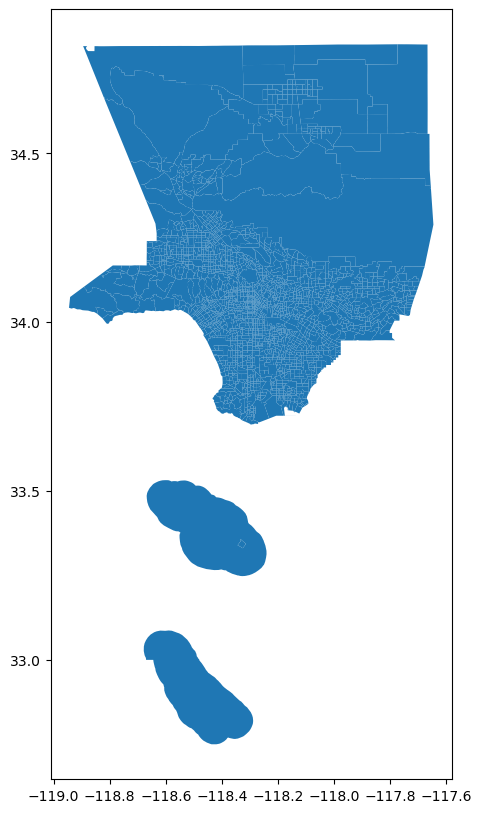

In [19]:
# plot it
tracts.plot(figsize=(12,10))

In [20]:
# info about this dataset
tracts.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2495 entries, 0 to 2494
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   OBJECTID       2495 non-null   int64   
 1   CT20           2495 non-null   object  
 2   LABEL          2495 non-null   object  
 3   ShapeSTArea    2495 non-null   float64 
 4   ShapeSTLength  2495 non-null   float64 
 5   geometry       2495 non-null   geometry
dtypes: float64(2), geometry(1), int64(1), object(2)
memory usage: 117.1+ KB


In [21]:
# only keep FIPS and geometry
tracts = tracts[['CT20','geometry']]
tracts.head()

,CT20,geometry
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


In [22]:
# create a FIPS column
tracts['FIPS'] ='06' + '037' + tracts['CT20']

/opt/conda/lib/python3.11/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [23]:
# check it
tracts.head()

,CT20,geometry,FIPS
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",06037101220
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",06037101222


In [24]:
# create a new dataframe based on the join
tracts['FIPS'] = tracts['FIPS'].astype(int)
df2['FIPS'] = df2['FIPS'].astype(int)

# Merge the DataFrames
tracts_income = tracts.merge(df2, on='FIPS')

/opt/conda/lib/python3.11/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/tmp/ipykernel_118/2312057885.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['FIPS'] = df2['FIPS'].astype(int)


In [25]:
# check it
tracts_income.head()

,CT20,geometry,FIPS,Total_Household,"Less than $10,000","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $74,999","$75,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 or More",Low-Income,Middle-Income,High-Income
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",6037101110,1551,67,96,33,72,11,78,19,56,96,74,221,102,182,144,123,177,528,723,300
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",6037101122,1383,84,0,7,44,20,29,0,4,10,31,208,173,102,181,204,286,198,695,490
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",6037101220,1349,85,61,9,91,24,24,71,39,60,81,209,172,43,109,130,141,464,614,271
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",6037101221,1424,84,90,59,136,26,107,9,91,65,145,95,150,140,65,111,51,667,595,162
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",6037101222,928,68,182,60,29,33,55,52,19,27,23,23,107,26,137,35,52,525,316,87


<Axes: >

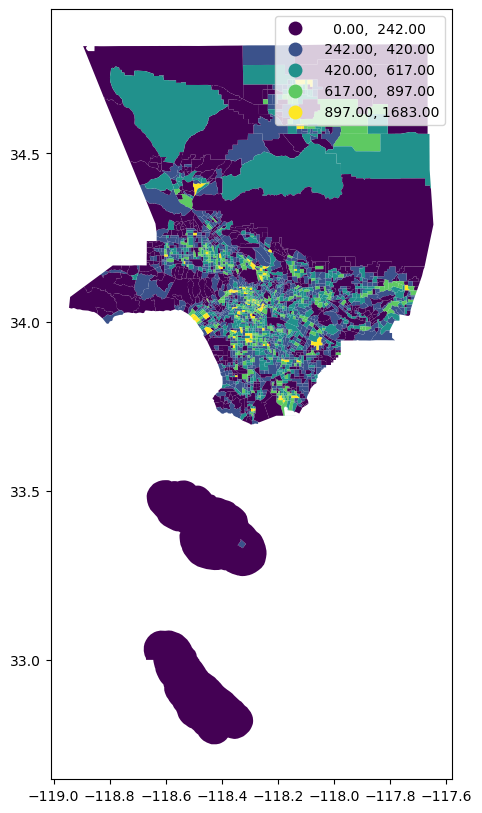

In [31]:
# create choropleth maps in geopandas
tracts_income.plot(figsize=(12,10),
                column='Low-Income',
                legend=True, 
                scheme='NaturalBreaks')

## Private Vehicle Accidents Map
In this part, I will add private vehicle traffic accidents data on household income census map. I will skip the exploration of private vehicle traffic accidents data, because one of my team member already have done it. And this part will display on another notebook.

In [27]:
# read private vehicle collision data
Collision = pd.read_csv('Data/Traffic_Collision_Data_2018_to_2022.csv')
Collision.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,Victim Age,Victim Sex,Victim Descent,Premise Code,Premise Description,Address,Cross Street,Location
0,180104039,01/01/2018,01/01/2018,1740,1,Central,192,997,TRAFFIC COLLISION,3101 3401 3701 3009 3025 3036,50.0,F,O,101.0,STREET,VENICE BL,GRAND AV,"(34.0363, -118.2677)"
1,180104668,01/10/2018,01/01/2018,1540,1,Central,182,997,TRAFFIC COLLISION,3101 3401 3701 3004 3030,NaN,M,W,101.0,STREET,VERDUGO RD,YUKON,"(34.042, -118.2625)"
2,180104040,01/01/2018,01/01/2018,1900,1,Central,154,997,TRAFFIC COLLISION,3101 3401 3701 3006 3030 3032,25.0,M,W,108.0,PARKING LOT,SPRING,6TH,"(34.046, -118.2509)"
3,180104001,01/01/2018,01/01/2018,38,1,Central,192,997,TRAFFIC COLLISION,3101 3401 3701 3002 3011 3034 3036,NaN,M,H,101.0,STREET,GRAND,WASHINGTON,"(34.0327, -118.2683)"
4,180104044,01/01/2018,01/01/2018,1030,1,Central,182,997,TRAFFIC COLLISION,3101 3401 3701 3004 3026 3036,33.0,M,B,101.0,STREET,HOPE,PICO,"(34.0395, -118.2656)"


In [28]:
# Import the shapely module from the GeoPandas library.
from shapely.geometry import Point

# Define a function to transform coordinate points.
def parse_location(location_str):
    try:
        lat, lon = map(float, location_str.strip("()").split(", "))
        return Point(lon, lat)
    except:
        return None

# Apply the function
Collision['geometry'] = Collision['Location'].apply(parse_location)

# Remove unneeded lines
Collision = Collision.dropna(subset=['geometry'])

In [32]:
# import json
# import plotly.graph_objects as go
# import plotly.express as px

# Collision['Longitude'] = Collision.geometry.apply(lambda geom: geom.x)
# Collision['Latitude'] = Collision.geometry.apply(lambda geom: geom.y)

# tracts_income_geojson = json.loads(tracts_income.to_json())

# create a scatter mapbox plot
# fig = px.scatter_mapbox(Collision,  
#                        lat="Latitude", 
#                        lon="Longitude", 
#                        mapbox_style="carto-positron")

# add the geojosn 
# fig.add_trace(go.Choroplethmapbox(geojson=tracts_income_geojson,
#                                  locations=tracts_income.index,  
#                                  z=tracts_income['Low-Income'],  
#                                  colorscale="Viridis",  
#                                  marker_opacity=0.5,
#                                  marker_line_width=0))

# fig.update_layout(
#    width = 800,
#    height = 800,
#    title = "Private Vehicle Traff Accidents Distribution on Number of Low-Income Household, 2018-2022",
#    title_x=0.5, 
#    legend=dict(
#        x=1.05, 
#        xanchor='right',
#        y=0.5
#    )
#)

#fig.show()

In [30]:
# save map as html
fig.write_html("low_income_private_accidents.html")

To avoid the notebook to be too large, I delete the code about private vehicle traffic accidents on middle-income and high income map. The code should be the same as low-income. Due to the large amount of private vehicle traffic accident data from 2018 to 2022, it is difficult to directly find its distribution characteristics in the above map, and it is also difficult to figure out the relationship between the household income and the accident rate. But we can still conclude that a large proportion of private vehicle traffic accidents are distributed in central Los Angeles, which is consistent with the distribution of low-income household. We will further analyze the distribution characteristics by selecting specific communities later.

Because the file is over 50MB, too large to upload to github, so I mark down part of code. And the interactive map saved as html file before code mark down.